In [1]:
%load_ext autoreload
%autoreload 2

In [57]:
from torchvision.transforms import Resize, Compose, InterpolationMode
import pandas as pd
import os
from PIL import Image
import numpy as np

## Importing custom modules

In [3]:
from super_image_resolution import get_root_path

In [5]:
WSI_IMAGES_PATH = "/scratch/mittal.nit/ICIAR2018_BACH_Challenge/Photos"
os.listdir(WSI_IMAGES_PATH)

['Invasive',
 'Benign',
 'InSitu',
 'microscopy_ground_truth.csv',
 '.DS_Store',
 'Normal']

In [50]:
def find_files(path: str, ext: str, recursive: bool=True):
    
    abs_paths = []
    
    def does_file_ext_match(path):
        fp = os.path.basename(path)
        if fp.split(".")[1] == ext:
            return True
        return False
        
    def recursive_search(path):
        if os.path.isfile(path) and does_file_ext_match(path):
            abs_paths.append(path)  
        if os.path.isdir(path):
            for content in os.listdir(path):
                recursive_search(os.path.join(path, content))
        
    if recursive: 
        recursive_search(path)
    else:
        if os.path.isfile(path) and does_file_ext_match(path):
            abs_paths.append(path)
            
    return abs_paths

In [52]:
files = find_files(WSI_IMAGES_PATH, "tif")

In [54]:
len(files)

400

In [55]:
img = Image.open(files[0])

In [58]:
arr = np.asarray(img)

In [59]:
arr.shape

(1536, 2048, 3)

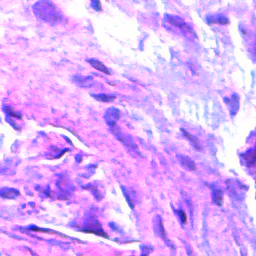

In [66]:
Image.fromarray(arr[:256, :256, :])

In [56]:
img.size

(2048, 1536)

In [6]:
os.listdir(os.path.join(WSI_IMAGES_PATH, "Invasive"))

['iv099.tif',
 'iv033.tif',
 'iv038.tif',
 'iv083.tif',
 'iv069.tif',
 'iv097.tif',
 'iv049.tif',
 'iv081.tif',
 'iv019.tif',
 'iv080.tif',
 'iv007.tif',
 'iv077.tif',
 'iv004.tif',
 'iv015.tif',
 'iv065.tif',
 'iv013.tif',
 'iv043.tif',
 'iv094.tif',
 'iv020.tif',
 'iv032.tif',
 'iv029.tif',
 'iv085.tif',
 'iv048.tif',
 'iv016.tif',
 'iv066.tif',
 'iv084.tif',
 'iv018.tif',
 'iv026.tif',
 'iv040.tif',
 'iv062.tif',
 'iv059.tif',
 'iv001.tif',
 'iv047.tif',
 'iv054.tif',
 'iv073.tif',
 'iv036.tif',
 'iv035.tif',
 'iv061.tif',
 'iv025.tif',
 'iv074.tif',
 'iv012.tif',
 'iv023.tif',
 'Thumbs.db',
 'iv044.tif',
 'iv052.tif',
 'iv006.tif',
 'iv070.tif',
 'iv093.tif',
 'iv045.tif',
 'iv063.tif',
 'iv003.tif',
 'iv091.tif',
 'iv072.tif',
 'iv079.tif',
 'iv068.tif',
 'iv030.tif',
 'iv034.tif',
 'iv086.tif',
 'iv076.tif',
 'iv060.tif',
 'iv051.tif',
 'iv057.tif',
 'iv039.tif',
 'iv027.tif',
 'iv046.tif',
 'iv082.tif',
 'iv096.tif',
 'iv008.tif',
 'iv053.tif',
 'iv088.tif',
 'iv024.tif',
 'iv08

In [15]:
img = Image.open(os.path.join(HPARAMS["DATA_PATH"], os.listdir(HPARAMS["DATA_PATH"])[0]))

In [21]:
lr_img = Compose([Resize(48), Resize(128, interpolation=InterpolationMode.NEAREST)])(img)
lr_img.save("lr_sample.png")

In [ ]:
lr_img